In [15]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: EBAY
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


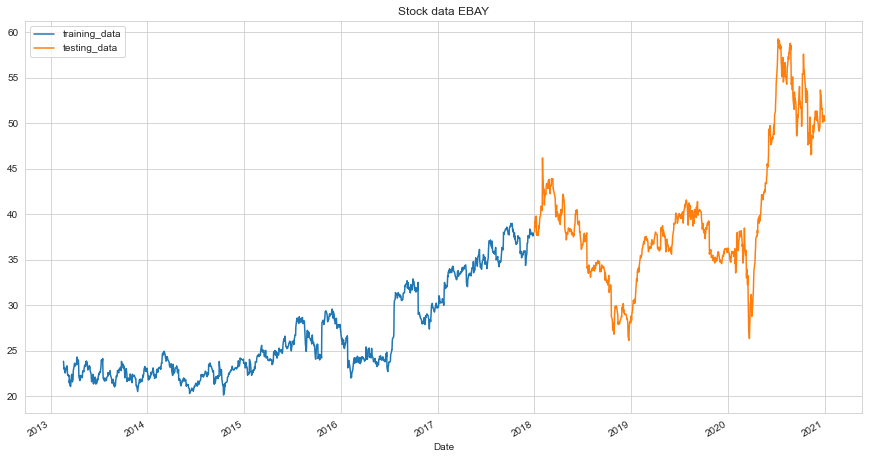

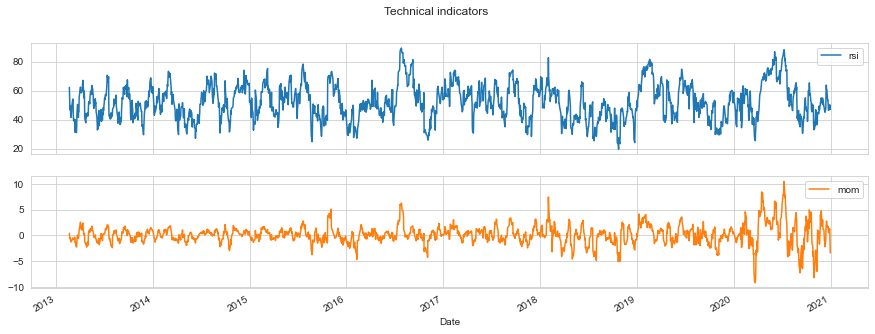

In [16]:
stock_name = 'ebay'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1301.25, duration: 0:00:00.231051
episode: 2/2000, episode end value: 1310.46, duration: 0:00:00.243055
episode: 3/2000, episode end value: 1304.18, duration: 0:00:00.240051
episode: 4/2000, episode end value: 1304.55, duration: 0:00:00.236053
episode: 5/2000, episode end value: 1305.69, duration: 0:00:00.219046
episode: 6/2000, episode end value: 1304.97, duration: 0:00:00.217064
episode: 7/2000, episode end value: 1303.82, duration: 0:00:00.215039
episode: 8/2000, episode end value: 1308.86, duration: 0:00:00.215048
episode: 9/2000, episode end value: 1306.77, duration: 0:00:00.217048
episode: 10/2000, episode end value: 1299.30, duration: 0:00:00.216061
episode: 11/2000, episode end value: 1309.68, duration: 0:00:00.212032
episode: 12/2000, episode end value: 1308.84, duration: 0:00:00.219051
episode: 13/2000, episode end value: 1306.25, duration: 0:00:00.211042
episode: 14/2000, episode end value: 1306.75, duration: 0:00:00.211048
episode: 15/200

episode: 117/2000, episode end value: 1347.53, duration: 0:00:00.259061
episode: 118/2000, episode end value: 1354.56, duration: 0:00:00.263075
episode: 119/2000, episode end value: 1358.96, duration: 0:00:00.253042
episode: 120/2000, episode end value: 1352.05, duration: 0:00:00.252054
episode: 121/2000, episode end value: 1362.50, duration: 0:00:00.249059
episode: 122/2000, episode end value: 1321.45, duration: 0:00:00.242051
episode: 123/2000, episode end value: 1346.53, duration: 0:00:00.252058
episode: 124/2000, episode end value: 1347.26, duration: 0:00:00.251054
episode: 125/2000, episode end value: 1350.44, duration: 0:00:00.246055
episode: 126/2000, episode end value: 1348.72, duration: 0:00:00.250055
episode: 127/2000, episode end value: 1355.58, duration: 0:00:00.253056
episode: 128/2000, episode end value: 1322.26, duration: 0:00:00.265074
episode: 129/2000, episode end value: 1323.09, duration: 0:00:00.254043
episode: 130/2000, episode end value: 1326.34, duration: 0:00:00

episode: 231/2000, episode end value: 1345.24, duration: 0:00:00.398088
episode: 232/2000, episode end value: 1348.07, duration: 0:00:00.363081
episode: 233/2000, episode end value: 1348.17, duration: 0:00:00.397091
episode: 234/2000, episode end value: 1343.69, duration: 0:00:00.356078
episode: 235/2000, episode end value: 1310.26, duration: 0:00:00.341078
episode: 236/2000, episode end value: 1346.59, duration: 0:00:00.352081
episode: 237/2000, episode end value: 1354.22, duration: 0:00:00.313072
episode: 238/2000, episode end value: 1347.80, duration: 0:00:00.316069
episode: 239/2000, episode end value: 1328.97, duration: 0:00:00.296068
episode: 240/2000, episode end value: 1354.64, duration: 0:00:00.303062
episode: 241/2000, episode end value: 1345.54, duration: 0:00:00.312072
episode: 242/2000, episode end value: 1347.86, duration: 0:00:00.310071
episode: 243/2000, episode end value: 1345.58, duration: 0:00:00.306069
episode: 244/2000, episode end value: 1325.19, duration: 0:00:00

episode: 345/2000, episode end value: 1329.74, duration: 0:00:00.359080
episode: 346/2000, episode end value: 1348.08, duration: 0:00:00.358081
episode: 347/2000, episode end value: 1325.34, duration: 0:00:00.356084
episode: 348/2000, episode end value: 1356.36, duration: 0:00:00.350076
episode: 349/2000, episode end value: 1329.53, duration: 0:00:00.390089
episode: 350/2000, episode end value: 1353.66, duration: 0:00:00.369083
episode: 351/2000, episode end value: 1351.03, duration: 0:00:00.380089
episode: 352/2000, episode end value: 1351.83, duration: 0:00:00.378081
episode: 353/2000, episode end value: 1329.63, duration: 0:00:00.353078
episode: 354/2000, episode end value: 1360.50, duration: 0:00:00.423097
episode: 355/2000, episode end value: 1298.97, duration: 0:00:00.399089
episode: 356/2000, episode end value: 1319.28, duration: 0:00:00.479106
episode: 357/2000, episode end value: 1324.68, duration: 0:00:00.528119
episode: 358/2000, episode end value: 1313.98, duration: 0:00:00

episode: 459/2000, episode end value: 1305.82, duration: 0:00:00.399090
episode: 460/2000, episode end value: 1304.02, duration: 0:00:00.394091
episode: 461/2000, episode end value: 1311.18, duration: 0:00:00.449097
episode: 462/2000, episode end value: 1308.59, duration: 0:00:00.411100
episode: 463/2000, episode end value: 1310.72, duration: 0:00:00.387083
episode: 464/2000, episode end value: 1309.34, duration: 0:00:00.486108
episode: 465/2000, episode end value: 1328.51, duration: 0:00:00.461105
episode: 466/2000, episode end value: 1351.59, duration: 0:00:00.401087
episode: 467/2000, episode end value: 1315.44, duration: 0:00:00.383086
episode: 468/2000, episode end value: 1330.80, duration: 0:00:00.433098
episode: 469/2000, episode end value: 1326.29, duration: 0:00:00.455101
episode: 470/2000, episode end value: 1321.12, duration: 0:00:00.491114
episode: 471/2000, episode end value: 1328.54, duration: 0:00:00.434097
episode: 472/2000, episode end value: 1327.67, duration: 0:00:00

episode: 573/2000, episode end value: 1328.60, duration: 0:00:00.412091
episode: 574/2000, episode end value: 1353.67, duration: 0:00:00.435098
episode: 575/2000, episode end value: 1293.53, duration: 0:00:00.417099
episode: 576/2000, episode end value: 1311.85, duration: 0:00:00.439095
episode: 577/2000, episode end value: 1325.89, duration: 0:00:00.516116
episode: 578/2000, episode end value: 1365.31, duration: 0:00:00.521115
episode: 579/2000, episode end value: 1303.62, duration: 0:00:00.519119
episode: 580/2000, episode end value: 1332.34, duration: 0:00:00.475107
episode: 581/2000, episode end value: 1332.78, duration: 0:00:00.421096
episode: 582/2000, episode end value: 1340.42, duration: 0:00:00.448101
episode: 583/2000, episode end value: 1334.42, duration: 0:00:00.488114
episode: 584/2000, episode end value: 1353.77, duration: 0:00:00.405090
episode: 585/2000, episode end value: 1334.73, duration: 0:00:00.412099
episode: 586/2000, episode end value: 1355.83, duration: 0:00:00

episode: 687/2000, episode end value: 1346.74, duration: 0:00:00.462108
episode: 688/2000, episode end value: 1344.10, duration: 0:00:00.487104
episode: 689/2000, episode end value: 1308.66, duration: 0:00:00.493107
episode: 690/2000, episode end value: 1328.11, duration: 0:00:00.470104
episode: 691/2000, episode end value: 1357.11, duration: 0:00:00.441099
episode: 692/2000, episode end value: 1311.41, duration: 0:00:00.454100
episode: 693/2000, episode end value: 1329.44, duration: 0:00:00.422094
episode: 694/2000, episode end value: 1366.36, duration: 0:00:00.524119
episode: 695/2000, episode end value: 1346.32, duration: 0:00:00.504112
episode: 696/2000, episode end value: 1281.16, duration: 0:00:00.414092
episode: 697/2000, episode end value: 1307.46, duration: 0:00:00.484111
episode: 698/2000, episode end value: 1306.06, duration: 0:00:00.445102
episode: 699/2000, episode end value: 1332.57, duration: 0:00:00.421095
episode: 700/2000, episode end value: 1335.91, duration: 0:00:00

episode: 801/2000, episode end value: 1353.05, duration: 0:00:00.451103
episode: 802/2000, episode end value: 1344.56, duration: 0:00:00.493112
episode: 803/2000, episode end value: 1334.97, duration: 0:00:00.550124
episode: 804/2000, episode end value: 1345.83, duration: 0:00:00.506112
episode: 805/2000, episode end value: 1333.83, duration: 0:00:00.475106
episode: 806/2000, episode end value: 1329.64, duration: 0:00:00.526119
episode: 807/2000, episode end value: 1329.54, duration: 0:00:00.464105
episode: 808/2000, episode end value: 1327.26, duration: 0:00:00.493110
episode: 809/2000, episode end value: 1341.96, duration: 0:00:00.494111
episode: 810/2000, episode end value: 1293.72, duration: 0:00:00.458105
episode: 811/2000, episode end value: 1325.85, duration: 0:00:00.501113
episode: 812/2000, episode end value: 1353.66, duration: 0:00:00.452104
episode: 813/2000, episode end value: 1327.81, duration: 0:00:00.452104
episode: 814/2000, episode end value: 1335.84, duration: 0:00:00

episode: 915/2000, episode end value: 1315.08, duration: 0:00:00.480104
episode: 916/2000, episode end value: 1331.63, duration: 0:00:00.469107
episode: 917/2000, episode end value: 1358.57, duration: 0:00:00.447099
episode: 918/2000, episode end value: 1319.79, duration: 0:00:00.459104
episode: 919/2000, episode end value: 1333.27, duration: 0:00:00.474107
episode: 920/2000, episode end value: 1309.78, duration: 0:00:00.398092
episode: 921/2000, episode end value: 1325.54, duration: 0:00:00.526120
episode: 922/2000, episode end value: 1323.56, duration: 0:00:00.444099
episode: 923/2000, episode end value: 1332.67, duration: 0:00:00.464104
episode: 924/2000, episode end value: 1353.40, duration: 0:00:00.493113
episode: 925/2000, episode end value: 1295.74, duration: 0:00:00.362081
episode: 926/2000, episode end value: 1323.50, duration: 0:00:00.481112
episode: 927/2000, episode end value: 1328.41, duration: 0:00:00.506115
episode: 928/2000, episode end value: 1330.47, duration: 0:00:00

episode: 1029/2000, episode end value: 1331.88, duration: 0:00:00.467100
episode: 1030/2000, episode end value: 1295.92, duration: 0:00:00.360086
episode: 1031/2000, episode end value: 1328.68, duration: 0:00:00.419093
episode: 1032/2000, episode end value: 1319.11, duration: 0:00:00.403091
episode: 1033/2000, episode end value: 1353.94, duration: 0:00:00.452098
episode: 1034/2000, episode end value: 1334.03, duration: 0:00:00.415095
episode: 1035/2000, episode end value: 1287.86, duration: 0:00:00.387087
episode: 1036/2000, episode end value: 1325.79, duration: 0:00:00.431094
episode: 1037/2000, episode end value: 1330.05, duration: 0:00:00.441100
episode: 1038/2000, episode end value: 1338.38, duration: 0:00:00.451100
episode: 1039/2000, episode end value: 1331.68, duration: 0:00:00.458109
episode: 1040/2000, episode end value: 1337.41, duration: 0:00:00.494108
episode: 1041/2000, episode end value: 1353.79, duration: 0:00:00.482109
episode: 1042/2000, episode end value: 1309.49, dur

episode: 1142/2000, episode end value: 1237.27, duration: 0:00:00.365080
episode: 1143/2000, episode end value: 1276.17, duration: 0:00:00.401093
episode: 1144/2000, episode end value: 1268.68, duration: 0:00:00.396088
episode: 1145/2000, episode end value: 1268.79, duration: 0:00:00.415093
episode: 1146/2000, episode end value: 1264.49, duration: 0:00:00.448100
episode: 1147/2000, episode end value: 1272.12, duration: 0:00:00.416093
episode: 1148/2000, episode end value: 1279.19, duration: 0:00:00.427097
episode: 1149/2000, episode end value: 1274.64, duration: 0:00:00.500112
episode: 1150/2000, episode end value: 1262.78, duration: 0:00:00.424099
episode: 1151/2000, episode end value: 1258.95, duration: 0:00:00.436094
episode: 1152/2000, episode end value: 1276.70, duration: 0:00:00.435098
episode: 1153/2000, episode end value: 1265.08, duration: 0:00:00.387088
episode: 1154/2000, episode end value: 1273.14, duration: 0:00:00.440101
episode: 1155/2000, episode end value: 1267.89, dur

episode: 1255/2000, episode end value: 1264.04, duration: 0:00:00.372084
episode: 1256/2000, episode end value: 1265.96, duration: 0:00:00.395089
episode: 1257/2000, episode end value: 1269.09, duration: 0:00:00.504113
episode: 1258/2000, episode end value: 1269.07, duration: 0:00:00.424094
episode: 1259/2000, episode end value: 1267.55, duration: 0:00:00.448100
episode: 1260/2000, episode end value: 1265.35, duration: 0:00:00.413094
episode: 1261/2000, episode end value: 1265.65, duration: 0:00:00.409091
episode: 1262/2000, episode end value: 1268.33, duration: 0:00:00.464104
episode: 1263/2000, episode end value: 1267.89, duration: 0:00:00.472102
episode: 1264/2000, episode end value: 1265.25, duration: 0:00:00.436097
episode: 1265/2000, episode end value: 1263.11, duration: 0:00:00.449102
episode: 1266/2000, episode end value: 1266.10, duration: 0:00:00.399090
episode: 1267/2000, episode end value: 1259.96, duration: 0:00:00.432095
episode: 1268/2000, episode end value: 1270.63, dur

episode: 1368/2000, episode end value: 1266.52, duration: 0:00:00.455101
episode: 1369/2000, episode end value: 1264.73, duration: 0:00:00.391093
episode: 1370/2000, episode end value: 1261.33, duration: 0:00:00.400092
episode: 1371/2000, episode end value: 1272.12, duration: 0:00:00.401088
episode: 1372/2000, episode end value: 1267.53, duration: 0:00:00.374087
episode: 1373/2000, episode end value: 1264.70, duration: 0:00:00.450106
episode: 1374/2000, episode end value: 1268.16, duration: 0:00:00.373079
episode: 1375/2000, episode end value: 1260.94, duration: 0:00:00.393088
episode: 1376/2000, episode end value: 1268.41, duration: 0:00:00.367081
episode: 1377/2000, episode end value: 1263.55, duration: 0:00:00.473104
episode: 1378/2000, episode end value: 1271.47, duration: 0:00:00.468107
episode: 1379/2000, episode end value: 1265.13, duration: 0:00:00.463103
episode: 1380/2000, episode end value: 1262.18, duration: 0:00:00.348079
episode: 1381/2000, episode end value: 1260.91, dur

episode: 1481/2000, episode end value: 1265.45, duration: 0:00:00.390088
episode: 1482/2000, episode end value: 1264.92, duration: 0:00:00.370081
episode: 1483/2000, episode end value: 1264.02, duration: 0:00:00.408094
episode: 1484/2000, episode end value: 1268.92, duration: 0:00:00.365081
episode: 1485/2000, episode end value: 1264.22, duration: 0:00:00.390087
episode: 1486/2000, episode end value: 1266.24, duration: 0:00:00.348080
episode: 1487/2000, episode end value: 1266.44, duration: 0:00:00.407093
episode: 1488/2000, episode end value: 1268.80, duration: 0:00:00.502110
episode: 1489/2000, episode end value: 1267.79, duration: 0:00:00.419097
episode: 1490/2000, episode end value: 1260.20, duration: 0:00:00.450099
episode: 1491/2000, episode end value: 1263.83, duration: 0:00:00.440100
episode: 1492/2000, episode end value: 1266.48, duration: 0:00:00.495111
episode: 1493/2000, episode end value: 1265.80, duration: 0:00:00.464109
episode: 1494/2000, episode end value: 1263.46, dur

episode: 1594/2000, episode end value: 1263.21, duration: 0:00:00.417094
episode: 1595/2000, episode end value: 1266.98, duration: 0:00:00.358079
episode: 1596/2000, episode end value: 1269.80, duration: 0:00:00.379083
episode: 1597/2000, episode end value: 1267.30, duration: 0:00:00.369084
episode: 1598/2000, episode end value: 1266.59, duration: 0:00:00.385089
episode: 1599/2000, episode end value: 1261.83, duration: 0:00:00.455101
episode: 1600/2000, episode end value: 1267.27, duration: 0:00:00.442097
episode: 1601/2000, episode end value: 1267.48, duration: 0:00:00.429096
episode: 1602/2000, episode end value: 1266.40, duration: 0:00:00.473107
episode: 1603/2000, episode end value: 1265.78, duration: 0:00:00.449102
episode: 1604/2000, episode end value: 1260.99, duration: 0:00:00.427096
episode: 1605/2000, episode end value: 1265.07, duration: 0:00:00.486110
episode: 1606/2000, episode end value: 1242.99, duration: 0:00:00.469109
episode: 1607/2000, episode end value: 1255.28, dur

episode: 1707/2000, episode end value: 1264.29, duration: 0:00:00.382093
episode: 1708/2000, episode end value: 1265.08, duration: 0:00:00.360083
episode: 1709/2000, episode end value: 1268.65, duration: 0:00:00.372082
episode: 1710/2000, episode end value: 1271.70, duration: 0:00:00.317073
episode: 1711/2000, episode end value: 1280.23, duration: 0:00:00.410097
episode: 1712/2000, episode end value: 1270.95, duration: 0:00:00.384087
episode: 1713/2000, episode end value: 1266.00, duration: 0:00:00.401086
episode: 1714/2000, episode end value: 1268.23, duration: 0:00:00.330075
episode: 1715/2000, episode end value: 1272.85, duration: 0:00:00.343081
episode: 1716/2000, episode end value: 1266.34, duration: 0:00:00.406087
episode: 1717/2000, episode end value: 1267.47, duration: 0:00:00.380085
episode: 1718/2000, episode end value: 1272.72, duration: 0:00:00.364083
episode: 1719/2000, episode end value: 1262.49, duration: 0:00:00.371084
episode: 1720/2000, episode end value: 1267.60, dur

episode: 1820/2000, episode end value: 1267.33, duration: 0:00:00.412094
episode: 1821/2000, episode end value: 1265.84, duration: 0:00:00.370082
episode: 1822/2000, episode end value: 1264.86, duration: 0:00:00.395089
episode: 1823/2000, episode end value: 1268.19, duration: 0:00:00.421094
episode: 1824/2000, episode end value: 1265.20, duration: 0:00:00.371080
episode: 1825/2000, episode end value: 1270.72, duration: 0:00:00.319069
episode: 1826/2000, episode end value: 1270.17, duration: 0:00:00.369083
episode: 1827/2000, episode end value: 1276.67, duration: 0:00:00.442098
episode: 1828/2000, episode end value: 1270.51, duration: 0:00:00.354081
episode: 1829/2000, episode end value: 1271.17, duration: 0:00:00.406092
episode: 1830/2000, episode end value: 1269.23, duration: 0:00:00.354080
episode: 1831/2000, episode end value: 1268.50, duration: 0:00:00.350083
episode: 1832/2000, episode end value: 1268.03, duration: 0:00:00.354081
episode: 1833/2000, episode end value: 1267.96, dur

episode: 1933/2000, episode end value: 1264.12, duration: 0:00:00.418102
episode: 1934/2000, episode end value: 1266.08, duration: 0:00:00.380079
episode: 1935/2000, episode end value: 1262.14, duration: 0:00:00.417093
episode: 1936/2000, episode end value: 1270.02, duration: 0:00:00.405090
episode: 1937/2000, episode end value: 1273.47, duration: 0:00:00.399092
episode: 1938/2000, episode end value: 1264.65, duration: 0:00:00.323072
episode: 1939/2000, episode end value: 1267.73, duration: 0:00:00.337075
episode: 1940/2000, episode end value: 1269.41, duration: 0:00:00.425097
episode: 1941/2000, episode end value: 1268.83, duration: 0:00:00.407088
episode: 1942/2000, episode end value: 1271.85, duration: 0:00:00.371088
episode: 1943/2000, episode end value: 1271.91, duration: 0:00:00.356080
episode: 1944/2000, episode end value: 1269.04, duration: 0:00:00.410091
episode: 1945/2000, episode end value: 1272.55, duration: 0:00:00.365083
episode: 1946/2000, episode end value: 1277.58, dur

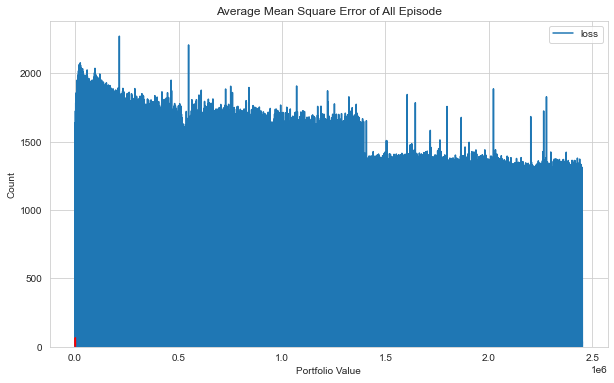

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

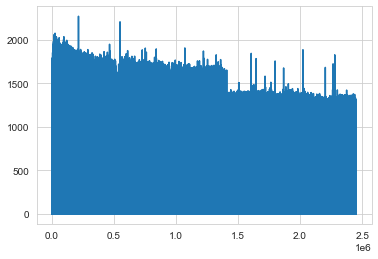

In [5]:
plt.plot(agent.model.losses)

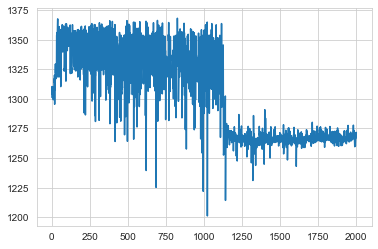

In [6]:
plt.plot(portfolio_value)

episode end value: 1226.91, duration: 0:00:00.097027
Sell: 395 times, Buy: 357 times


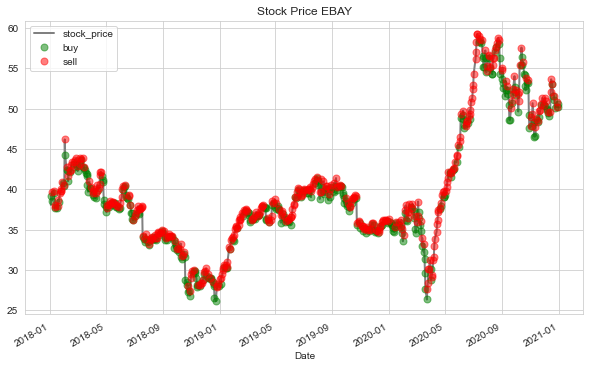

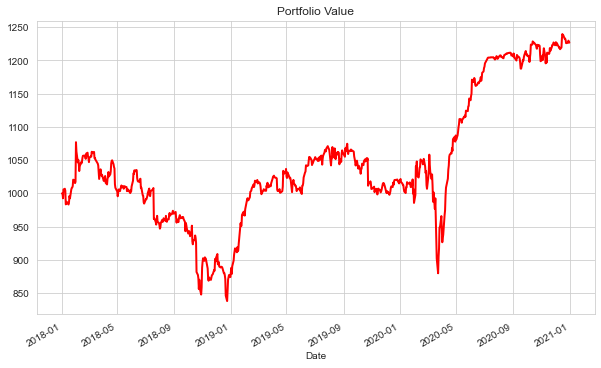

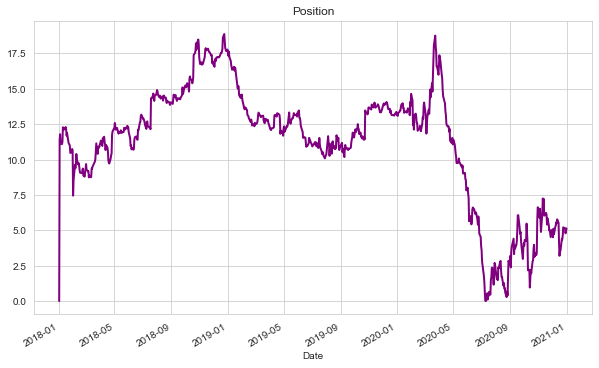

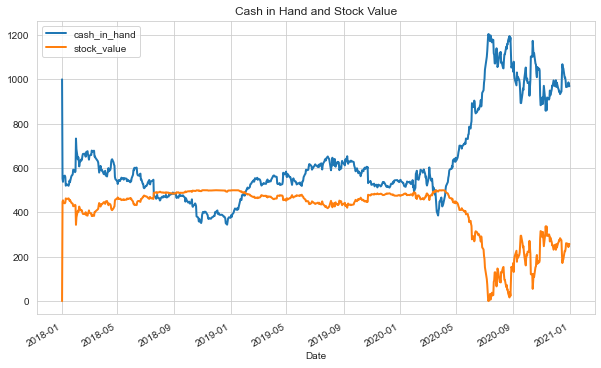

In [17]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [18]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: EBAY
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.05 %
Volatility: 0.1344
shape ratio: 0.4431
Maximun drawdown: -22.21 %
Calmar ratio: 0.3176
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 9.70 %
Volatility (benchmark): 0.3144
shape ratio: 0.2736
Maximun drawdown: -43.41 %
Calmar ratio (benchmark): 0.2236


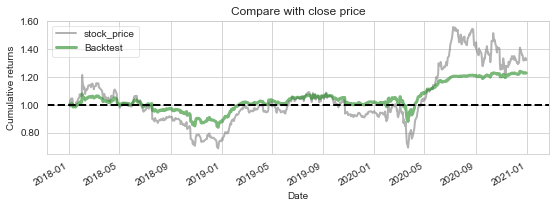

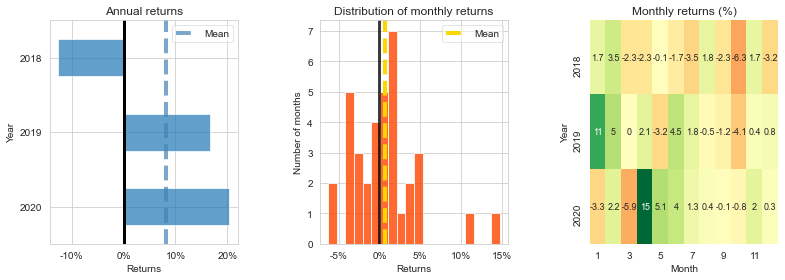

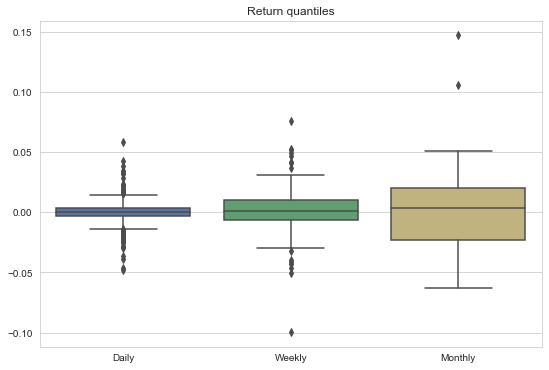

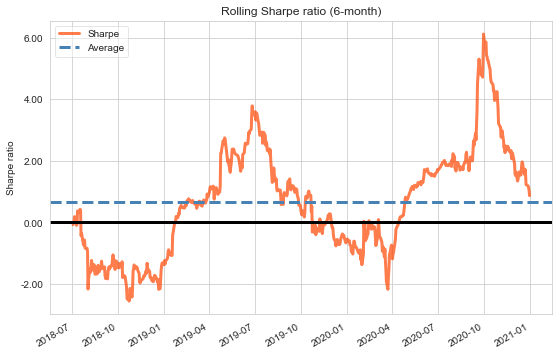

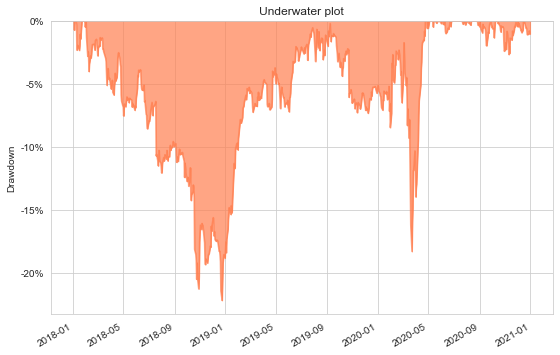

In [19]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')